In [6]:
# Imoplementing the decision tree regression
# Decision tree is non-parametric model

import numpy as np
from sklearn import linear_model , datasets , tree
import matplotlib.pyplot as plt
%matplotlib inline



Text(0.5, 1.0, 'Fig 1 : Data for linear Regression')

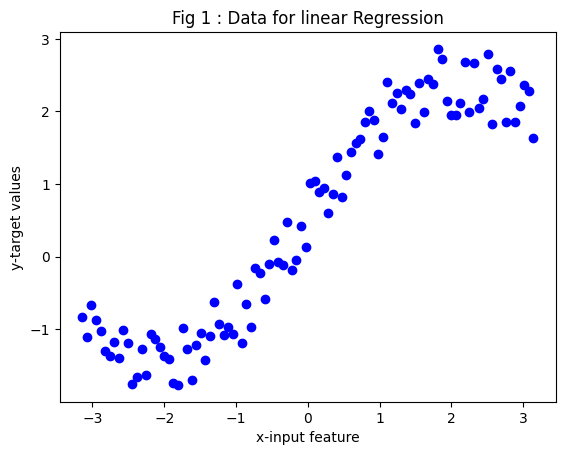

In [8]:
# Preparing the data

number_of_samples = 100
x = np.linspace(-np.pi , np.pi , number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)

plt.scatter(x , y , color = 'blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1 : Data for linear Regression')

In [9]:
# Same as we did before Split the data into three parts:
# -> Training , validation , test sets

random_indices = np.random.permutation(number_of_samples)

#training set , 70%
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]

#validation set  , 15%
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]

#test set , 15%
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

In [10]:
#fitting a line to the data

maximum_depth_of_tree = np.arange(10) + 1
train_err_arr = []
val_err_arr = []
test_err_arr = []

Training MSE:  0.34011267456096345 Validation MSE:  0.2542911817623925 Test MSE:  0.5406607643670333
Training MSE:  0.09639433748722871 Validation MSE:  0.17138837984492092 Test MSE:  0.1374328886531918
Training MSE:  0.06845703219786499 Validation MSE:  0.1258604652048586 Test MSE:  0.1428045155977165
Training MSE:  0.05022406132109347 Validation MSE:  0.12581171065705693 Test MSE:  0.12166277773274113
Training MSE:  0.033434421912007684 Validation MSE:  0.16404275453613973 Test MSE:  0.16963881513063744
Training MSE:  0.016669658593188655 Validation MSE:  0.1594470893661903 Test MSE:  0.16451751277142634
Training MSE:  0.00941239726398088 Validation MSE:  0.17927286598961314 Test MSE:  0.16042836161245994
Training MSE:  0.005858059883267587 Validation MSE:  0.16771915419767225 Test MSE:  0.1747710396073986
Training MSE:  0.0017415027905396717 Validation MSE:  0.1731664692098354 Test MSE:  0.19161042406886908
Training MSE:  0.0 Validation MSE:  0.1731664692098354 Test MSE:  0.19161042

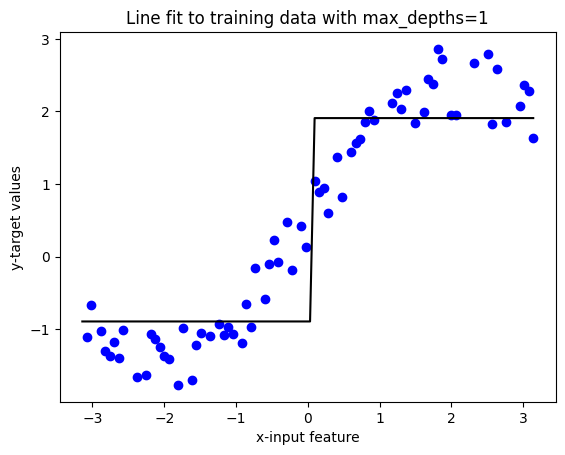

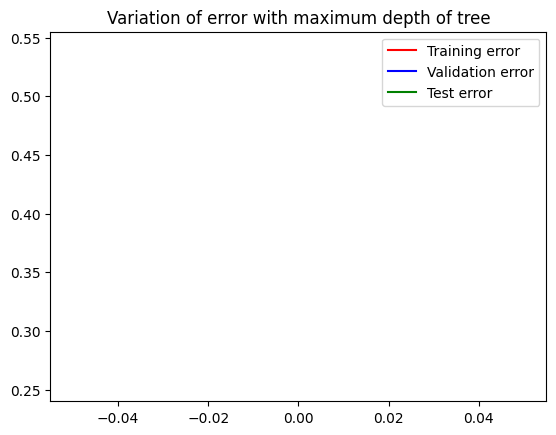

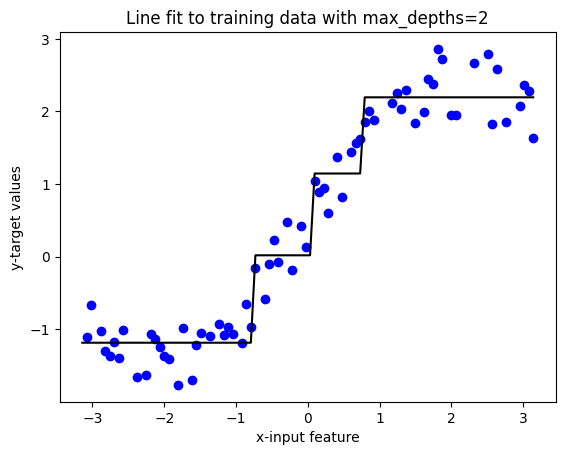

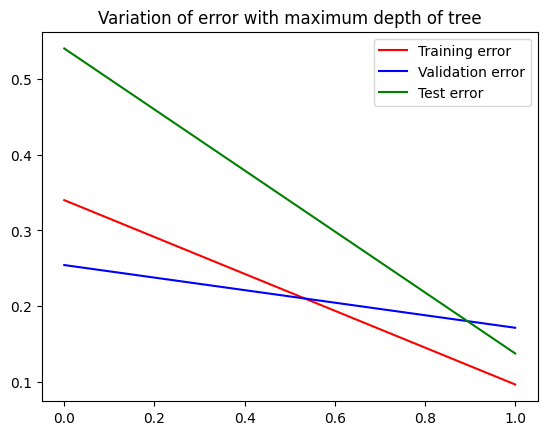

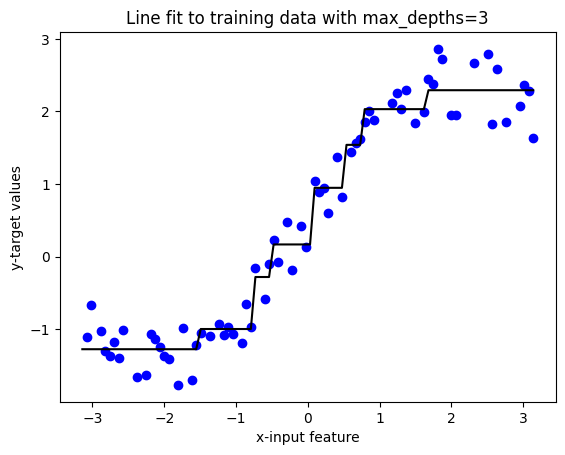

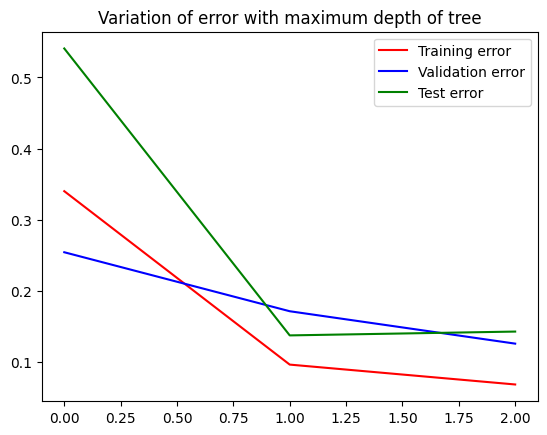

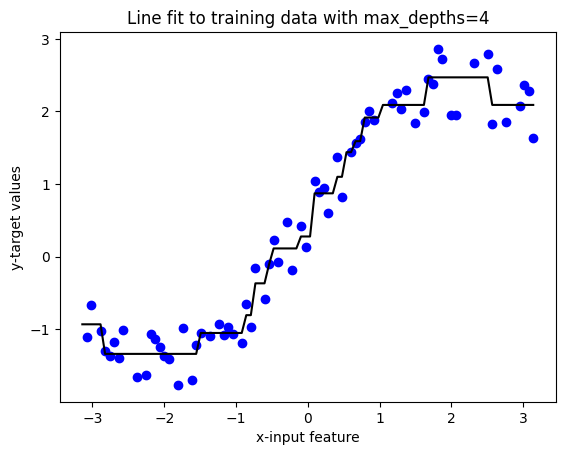

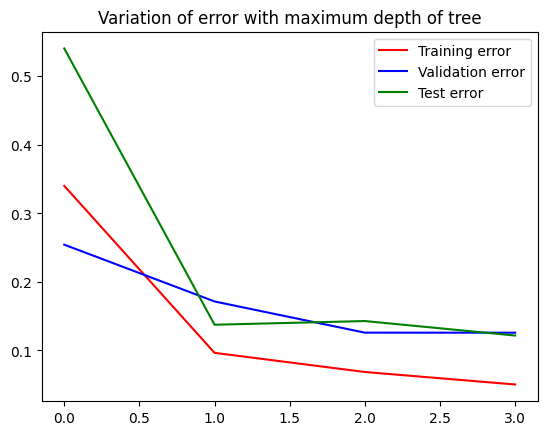

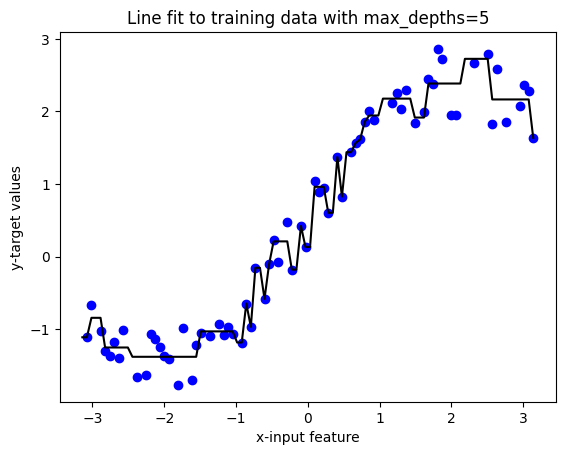

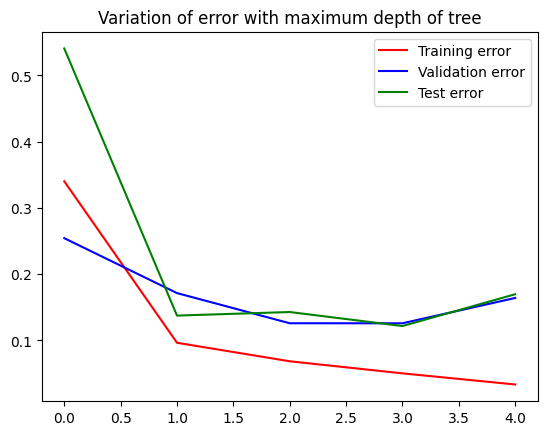

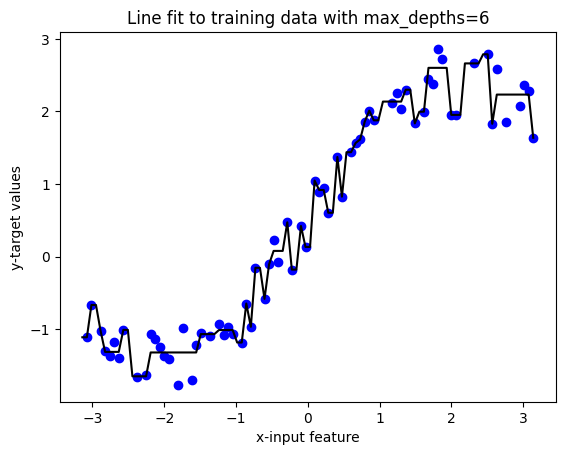

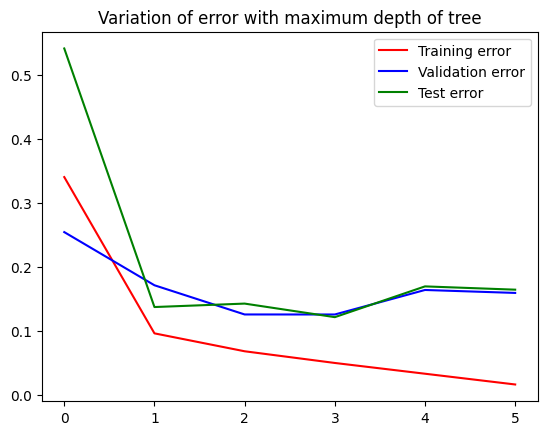

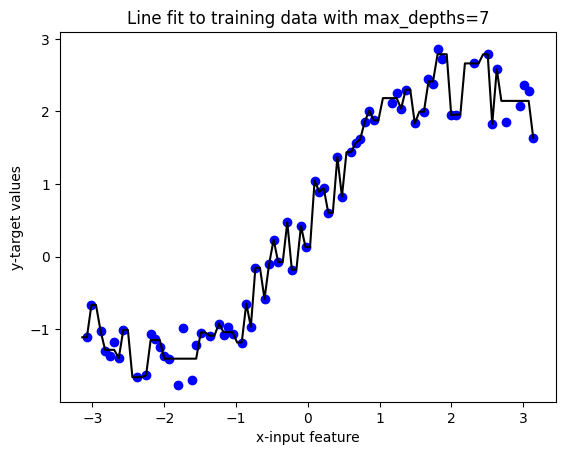

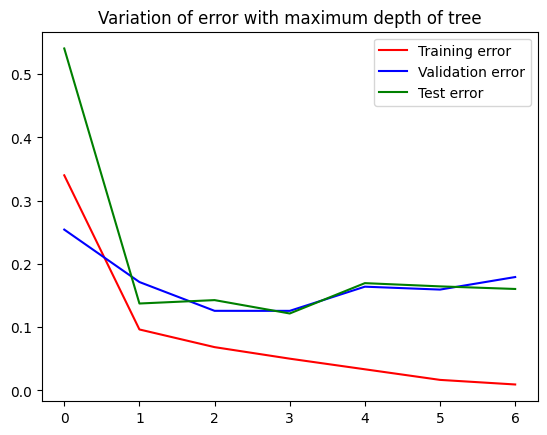

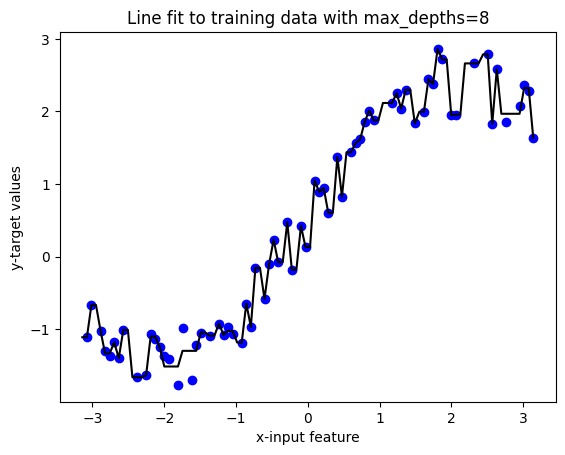

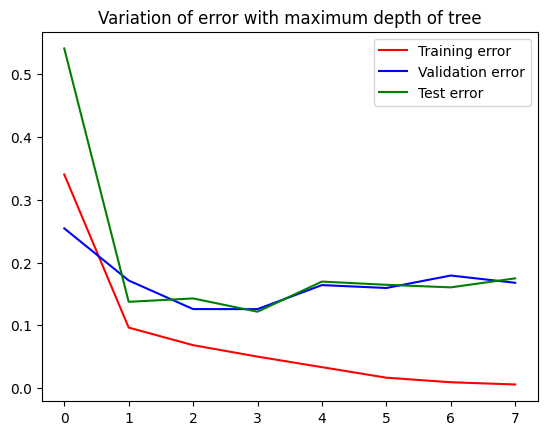

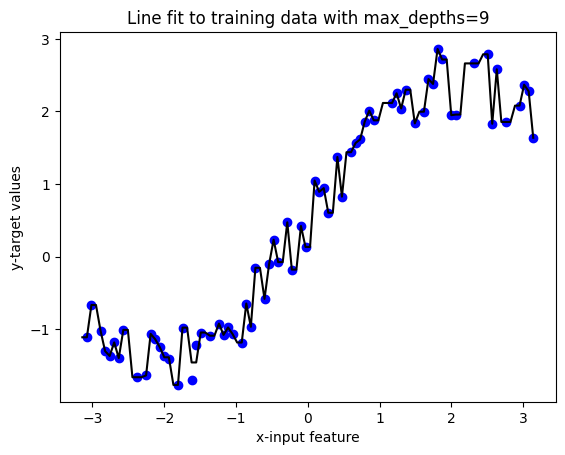

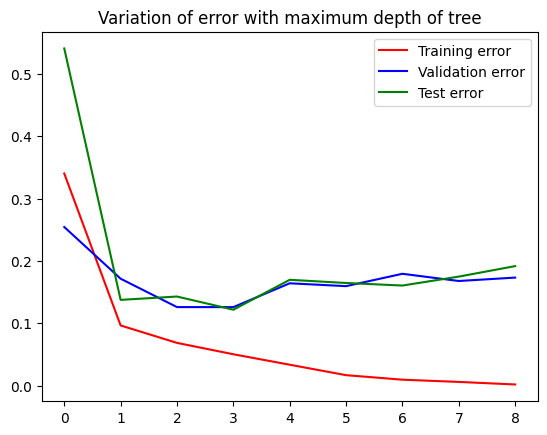

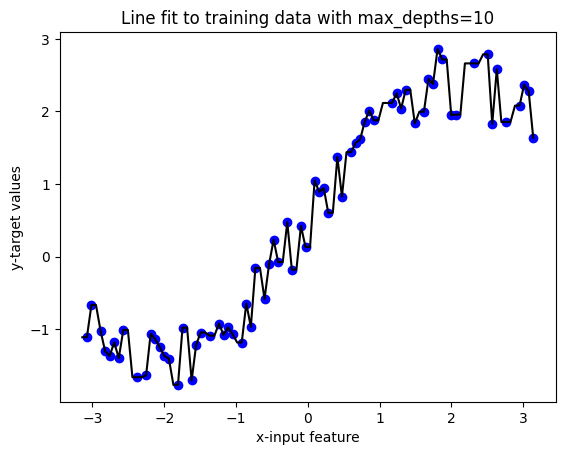

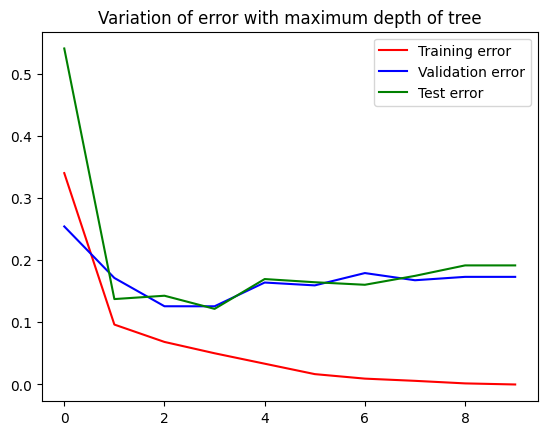

In [12]:
# starting loop , iterating on the maximum depth of tree

for depth in maximum_depth_of_tree:

    model = tree.DecisionTreeRegressor(max_depth = depth)
    x_train_for_line_fitting = np.asarray(x_train.reshape(len(x_train) , 1))
    y_train_for_line_fitting = np.asarray(y_train.reshape(len(y_train) , 1))


    # fit the line to the training data

    model.fit(x_train_for_line_fitting , y_train_for_line_fitting)


    #plot the line

    plt.figure()
    plt.scatter(x_train , y_train , color = "blue")
    plt.plot(x.reshape((len(x),1)), model.predict(x.reshape((len(x),1))) , color="black")
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depths=' + str(depth))

    mean_train_error = np.mean((y_train - model.predict(x_train.reshape(len(x_train), 1)))**2)
    mean_val_error = np.mean((y_val - model.predict(x_val.reshape(len(x_val),1)))**2)
    mean_test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test), 1)))**2)


    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print('Training MSE: ' , mean_train_error , 'Validation MSE: ' , mean_val_error , 'Test MSE: ' , mean_test_error)


    plt.figure()
    plt.plot(train_err_arr , c="red")
    plt.plot(val_err_arr , c="blue")
    plt.plot(test_err_arr , c="green")
    plt.legend(['Training error' , 'Validation error' , 'Test error'])
    plt.title('Variation of error with maximum depth of tree')
